Here are the libraries I needed to import for task completion. In the first code snippet, I have written code to make a hexagonal grid.

1) numpy

2) matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
import matplotlib


def create_hex_grid(nx: int = 4,
                    ny: int = 5,
                    min_diam: float = 1.,
                    n: int = 0,
                    align_to_origin: bool = True,
                    face_color = (1, 1, 1, 0),
                    edge_color = '#000000',
                    plotting_gap: float = 0.,
                    crop_circ: float = 0.,
                    do_plot: bool = False,
                    rotate_deg: float = 0.,
                    keep_x_sym: bool = True,
                    h_ax: plt.Axes = None,
                    line_width: float = 0.2,
                    background_color = (1,1,1,0)) -> (np.ndarray, plt.Axes):
    """
    Creates and prints hexagonal lattices.
    nx: Number of horizontal hexagons in rectangular grid, [nx * ny]
    ny: Number of vertical hexagons in rectangular grid, [nx * ny]
    min_diam: Minimal diameter of each hexagon.
    n: Alternative way to create rectangular grid. The final grid might have less hexagons
    align_to_origin: Shift the grid s.t. the central tile will center at the origin
    face_color: Provide RGB triplet, valid abbreviation (e.g. 'k') or RGB+alpha
    edge_color: Provide RGB triplet, valid abbreviation (e.g. 'k') or RGB+alpha
    plotting_gap: Gap between the edges of adjacent tiles, in fraction of min_diam
    crop_circ: Disabled if 0. If >0 a circle of central tiles will be kept, with radius r=crop_circ
    do_plot: Add the hexagon to an axes. If h_ax not provided a new figure will be opened.
    rotate_deg: Rotate the grid around the center of the central tile, by rotate_deg degrees
    keep_x_sym: NOT YET IMPLEMENTED
    h_ax: Handle to axes. If provided the grid will be added to it, if not a new figure will be opened.
    line_width: The width of the hexagon lines
    background_color: The color of the axis background
    :return:
    """

    coord_x, coord_y = make_grid(nx, ny, min_diam, n, crop_circ, rotate_deg, align_to_origin)
    if do_plot:
        h_ax = plot_single_lattice(coord_x, coord_y, face_color, edge_color, min_diam, plotting_gap, rotate_deg, h_ax,
                                   background_color, line_width)

    return np.hstack([coord_x, coord_y]), h_ax

def plot_single_lattice( coord_x, coord_y, face_color, edge_color, min_diam, plotting_gap, rotate_deg, h_ax=None,
                        background_color=None, line_width=0.2):
    """
    Adds a single lattice to the axes canvas. Multiple calls can be made to overlay few lattices.
    :return:
    """
    if h_ax is None:
        h_fig = plt.figure(figsize=(5, 5))
        h_ax = h_fig.add_axes([0.05, 0.05, 0.9, 0.9])

    radius = min_diam / np.sqrt(3) * (1 - plotting_gap)
    orientation = 0

    patches = []
    colors=[]
    for (curr_x, curr_y), cell_value in zip(zip(coord_x.flatten(), coord_y.flatten()), grid.flatten()):
        polygon = mpatches.RegularPolygon((curr_x, curr_y), numVertices=6, radius=radius, orientation=orientation)
        patches.append(polygon)

        if cell_value == 1:
            colors.append('white')  # White color for live cells
        else:
            colors.append('black')  # Black color for dead cells

    collection = PatchCollection(patches, edgecolor='gray', facecolor=colors, linewidths=0.5)
    h_ax.add_collection(collection)

    h_ax.set_aspect('equal')
    h_ax.axis([coord_x.min() - 2 * min_diam, coord_x.max() + 2 * min_diam, coord_y.min() - 2 * min_diam,
               coord_y.max() + 2 * min_diam])

    return h_ax

def make_grid(nx, ny, min_diam, n, crop_circ, rotate_deg, align_to_origin) -> (np.ndarray, np.ndarray):
    """
    Computes the coordinates of the hexagon centers, given the size rotation and layout specifications
    :return:
    """
    ratio = np.sqrt(3) / 2
    if n > 0:  # n variable overwrites (nx, ny) in case all three were provided
        ny = int(np.sqrt(n / ratio))
        nx = n // ny

    coord_x, coord_y = np.meshgrid(np.arange(nx), np.arange(ny), sparse=False, indexing='xy')
    coord_y = coord_y * ratio
    coord_x = coord_x.astype('float')
    coord_x[1::2, :] += 0.5
    coord_x = coord_x.reshape(-1, 1)
    coord_y = coord_y.reshape(-1, 1)

    coord_x *= min_diam  # Scale to requested size
    coord_y = coord_y.astype('float') * min_diam

    mid_x = (np.ceil(nx / 2) - 1) + 0.5 * (np.ceil(ny/2) % 2 == 0)  # Pick center of some hexagon as origin for rotation or crop...
    mid_y = (np.ceil(ny / 2) - 1) * ratio  # np.median() averages center 2 values for even arrays :\
    mid_x *= min_diam
    mid_y *= min_diam

    # mid_x = (nx // 2 - (nx % 2 == 1)) * min_diam + 0.5 * (ny % 2 == 1)
    # mid_y = (ny // 2 - (ny % 2)) * min_diam * ratio

    if crop_circ > 0:
        rad = ((coord_x - mid_x)**2 + (coord_y - mid_y)**2)**0.5
        coord_x = coord_x[rad.flatten() <= crop_circ, :]
        coord_y = coord_y[rad.flatten() <= crop_circ, :]

    if not np.isclose(rotate_deg, 0):  # Check if rotation is not 0, with tolerance due to float format
        # Clockwise, 2D rotation matrix
        RotMatrix = np.array([[np.cos(np.deg2rad(rotate_deg)), np.sin(np.deg2rad(rotate_deg))],
                              [-np.sin(np.deg2rad(rotate_deg)), np.cos(np.deg2rad(rotate_deg))]])
        rot_locs = np.hstack((coord_x - mid_x, coord_y - mid_y)) @ RotMatrix.T
        # rot_locs = np.hstack((coord_x - mid_x, coord_y - mid_y))
        coord_x, coord_y = np.hsplit(rot_locs + np.array([mid_x, mid_y]), 2)

    if align_to_origin:
        coord_x -= mid_x
        coord_y -= mid_y

    return coord_x, coord_y



In [ ]:
'''
#Creating hexagonal grid
hex_centers = create_hex_grid(nx=50,
                                 ny=50,
                                 do_plot=True)

plt.show()
'''

'\n#Creating hexagonal grid\nhex_centers = create_hex_grid(nx=50,\n                                 ny=50,\n                                 do_plot=True)\n                                 \nplt.show() \n'

Here is the code containing the following rules:

1)Any live cell with fewer than two live neighbors dies, as if by underpopulation.

2)Any live cell with two or three live neighbors lives on to the next generation.

3) Any live cell with more than three live neighbors dies, as if by overpopulation.

4) Any dead cell with exactly three live neighbors becomes a live cell, as if by reproduction.

5) Every dead cell resurrects after 6 generations irrespective of the number of live neighbors.

6) All the resurrected cells can not die by the way in which they previously died.

7) Every 4 generations a random dead cell comes to life irrespective of the number of live neighbors.

Here I have considered all the cells which have come to life by rule 4, 5 or 7 to be resurrected cells.

The cells which were alive during step 0 are considered to be the naturally alive cell.

I have made three 2-D lists prev_reason, reason, res_nat.

Prev_reason tells the reason by which the cell died before, its value is A by default and changes to U(underpopulation) or O(overpopulation) in subsequent steps.

reason tells the reason by which the cell may die in the current steps, value is B by default and U and O accordingly.


In [ ]:
import random
def gen_4_rule(grid):                                      #Rule 7
  i = random.randint(0, grid.shape[0]-1)
  j = random.randint(0, grid.shape[1]-1)
  if grid[i,j]==0:
    new_grid[i, j] == 1           # one random dead cell comes to life after 4 generation
  else:
    gen_4_rule(grid)

def gen_6_rule(grid, new_grid):                           # Rule 5
  for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
          if grid[i, j]==0:
            new_grid[i, j]==1                             # All dead cells resurrects after 6 generations

def hexagonal_life_step(grid, step, prev_reason, reason):
    neighbors_offsets = [(1, 0), (-1, 0), (0.5, np.sqrt(3)/2), (-0.5, np.sqrt(3)/2), (0.5, -np.sqrt(3)/2), (-0.5, -np.sqrt(3)/2)]
    new_grid = grid.copy()
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            alive_neighbors = 0
            for dx, dy in neighbors_offsets:     # value of coordinates of neighbouring cells
              if (dx, dy)==(0.5, np.sqrt(3)/2):
                ni, nj = i + 1, j+1
                if 0 <= ni < grid.shape[0] and 0 <= nj < grid.shape[1]:
                    alive_neighbors += grid[ni, nj]
              if (dx, dy)==(-0.5, np.sqrt(3)/2):
                ni, nj = i - 1, j+1
                if 0 <= ni < grid.shape[0] and 0 <= nj < grid.shape[1]:
                    alive_neighbors += grid[ni, nj]
              if (dx, dy)==(0.5, -np.sqrt(3)/2):
                ni, nj = i +1, j-1
                if 0 <= ni < grid.shape[0] and 0 <= nj < grid.shape[1]:
                    alive_neighbors += grid[ni, nj]
              if (dx, dy)==(-0.5, -np.sqrt(3)/2):
                ni, nj = i-1, j-1
                if 0 <= ni < grid.shape[0] and 0 <= nj < grid.shape[1]:
                    alive_neighbors += grid[ni, nj]
              else:
                ni, nj = i + dx, j + dy
                ni, nj = int(ni), int(nj)
                if 0 <= ni < grid.shape[0] and 0 <= nj < grid.shape[1]:
                    alive_neighbors += grid[ni, nj]


            # Apply the Game of Life rules
            if grid[i, j] == 1:                              #Rule 1, 2 3
                if alive_neighbors < 2:
                  reason[i][j] = 'U'
                  if prev_reason[i][j]!= reason[i][j]:
                      new_grid[i, j] = 0                     #Rule 6
                      prev_reason[i][j]=reason[i][j]

                if alive_neighbors > 3:
                  reason[i][j] = 'O'
                  if prev_reason[i][j]!= reason[i][j]:
                      new_grid[i, j] = 0                   #Rule 6
                      prev_reason[i][j]=reason[i][j]
                else:
                  new_grid[i, j]=1
            if grid[i, j]==0:
                if alive_neighbors == 3:
                    new_grid[i, j] = 1  # Rule 4

    if step%4 == 0 and step!=0: # Rule 7
      gen_4_rule(grid)
    if step!=0 and step%6==0:   # rule 6
      gen_6_rule(grid, new_grid)
    return new_grid


Here is the code to generate the Conway's Game of Life and plots the grid formed in each step, I have printed it for 10 steps. The no. of steps can be changed.

Assumption: A

Here I have made a grid of 10*10. It can be changed by changing the value of nx and ny.
I have taken the total no. of steps to be 10, it can be modified by changing the value of num_steps.

Generation 0:
Generation : 1


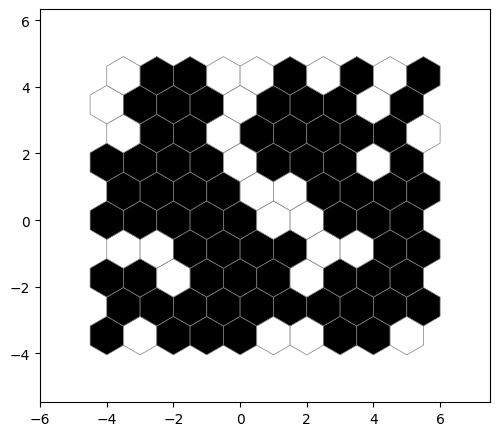

Generation : 2


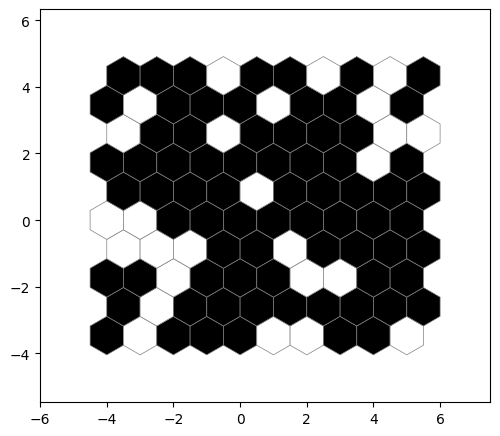

Generation : 3


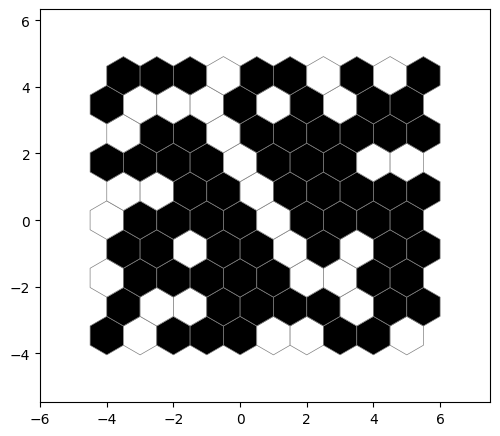

Generation : 4


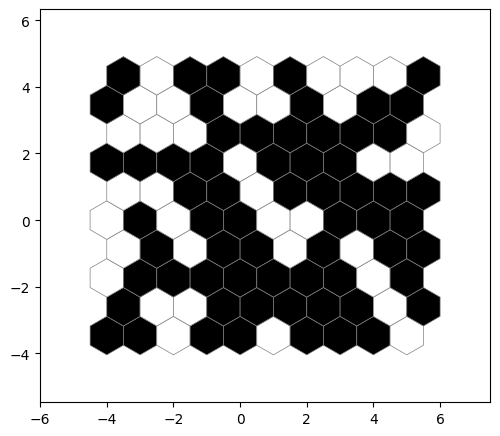

Generation : 5


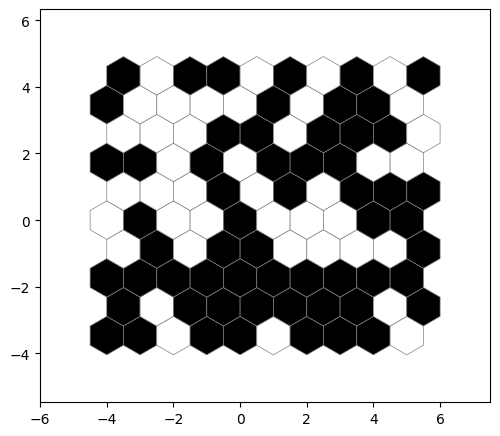

Generation : 6


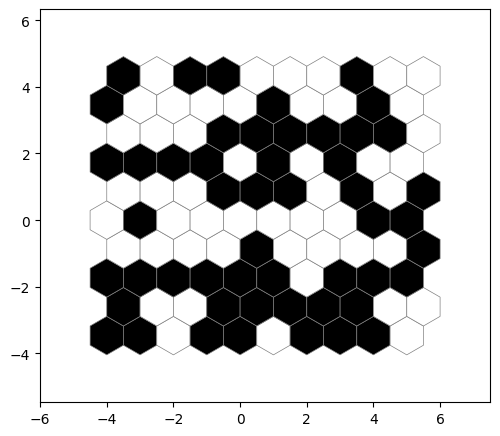

Generation : 7


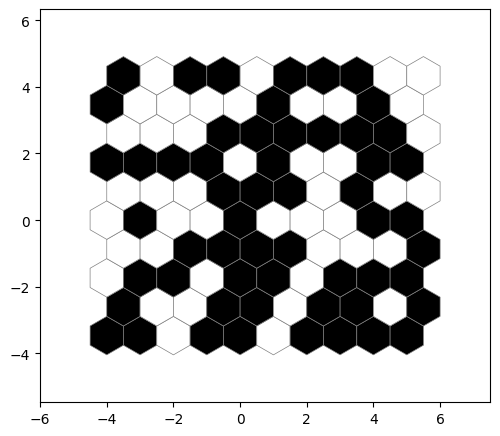

Generation : 8


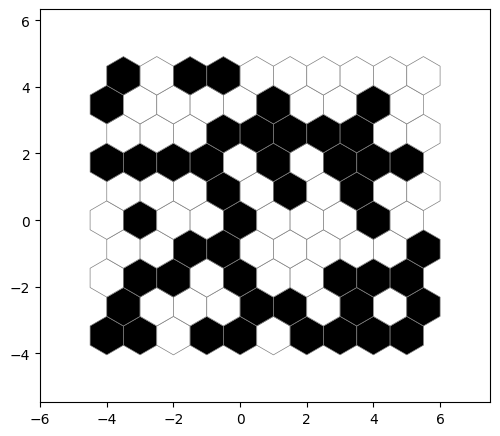

Generation : 9


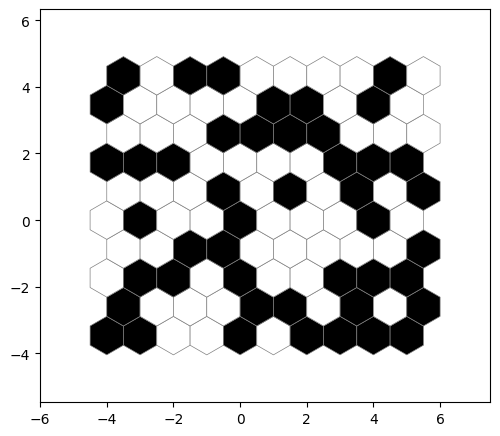

Generation : 10


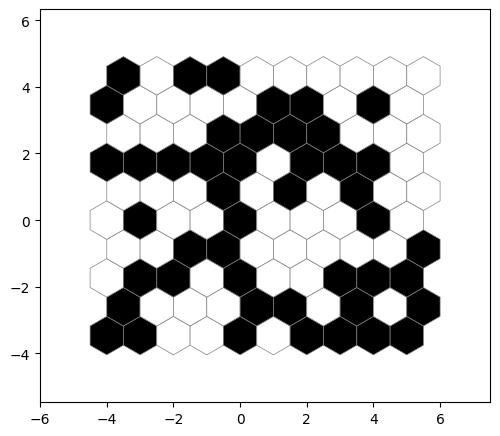

Generation : 11


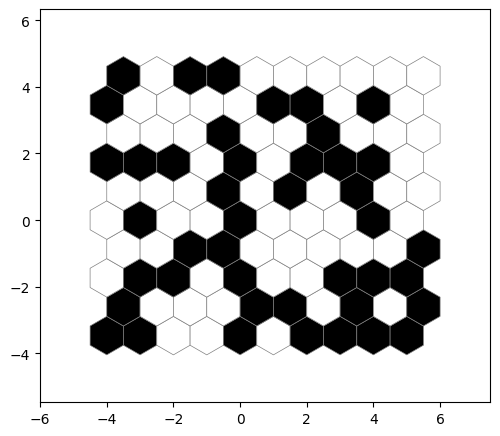

Generation : 12


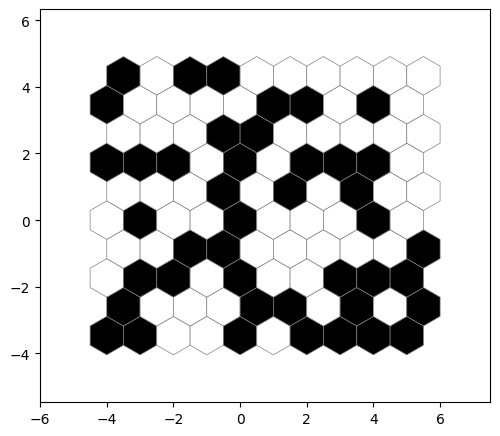

Generation : 13


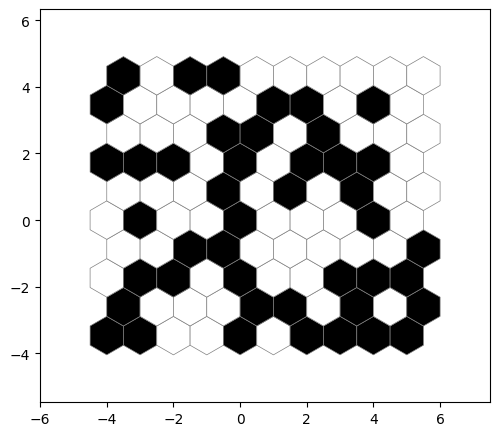

Generation : 14


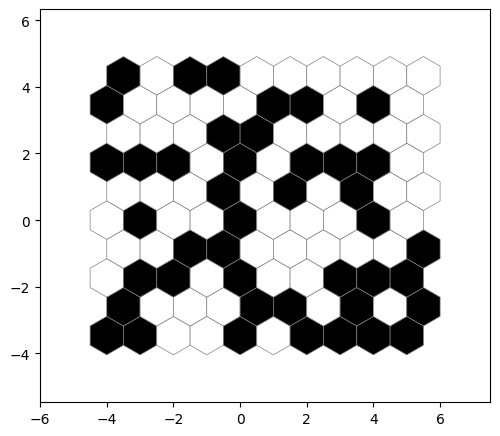

Generation : 15


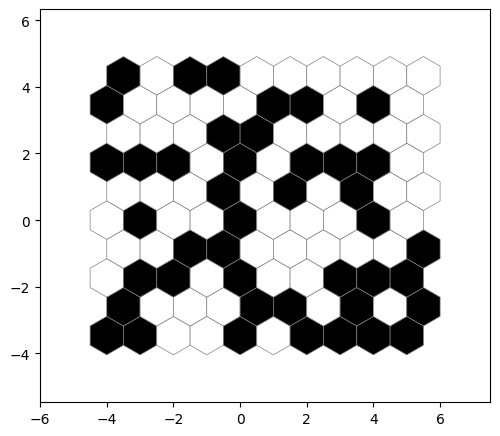

Generation : 16


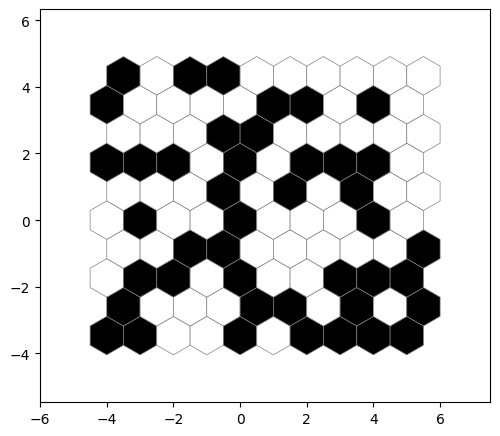

Generation : 17


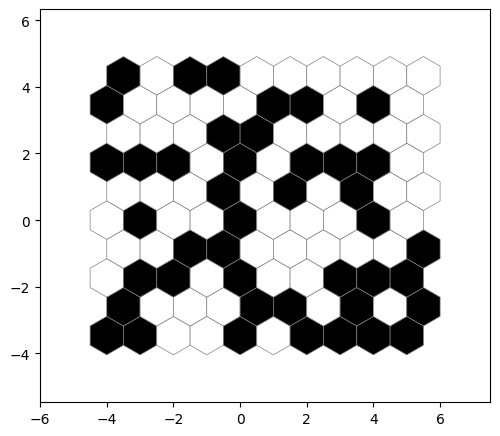

Generation : 18


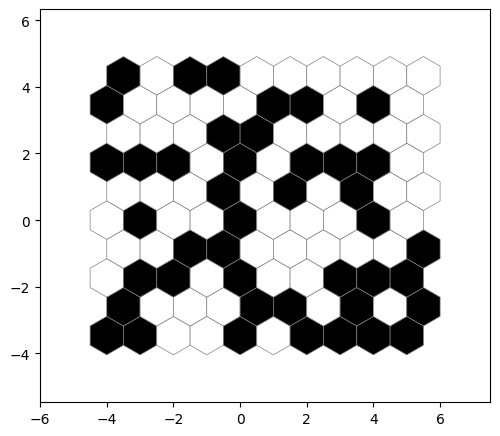

Generation : 19


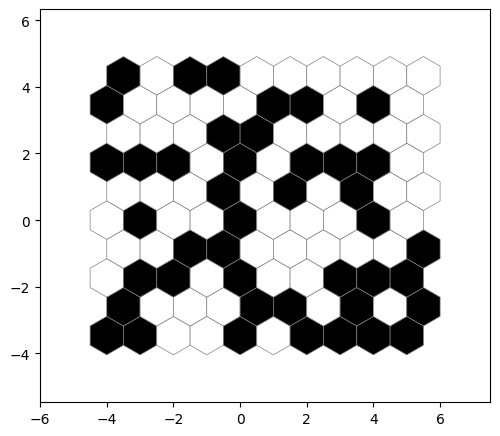

Generation : 20


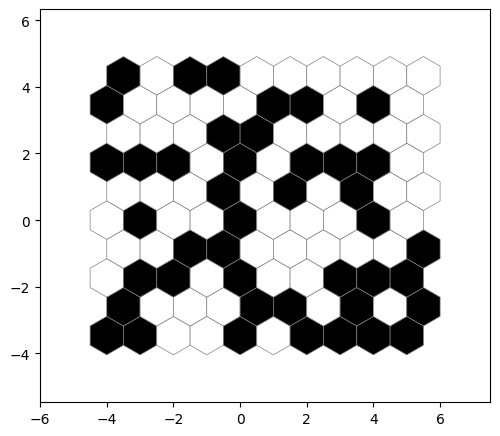

In [ ]:
import matplotlib.pyplot as plt
nx, ny = 10, 10
random_grid = np.random.rand(nx, ny)
threshhold=0.5
initial_grid = (random_grid>threshhold).astype(int)  #generating grid with random live and dead cells
new_grid=initial_grid

print("Generation 0:")
#hex_centers, ax = create_hex_grid(nx=nx, ny=ny, do_plot=True)  #Generates initial grid

#plt.title("Generation 0: ")
#Create hexagonal grid
#grid=new_grid
#hex_centers, ax = create_hex_grid(nx=nx, ny=ny, do_plot=True)

# Simulation
num_steps =  20                         # this value can be changed to print more no. of steps
prev_reason=[]                           # reason by which cell died before
reason=[]                                # how cell can die in this step
for i in range(ny):
  prev_row = []
  row = []
  for j in range(nx):
    prev_row.append('A')
    row.append('B')

  prev_reason.append(prev_row)
  reason.append(row)

for step in range(num_steps):
    print("Generation :", step+1)
    grid = hexagonal_life_step(initial_grid, step, prev_reason, reason)    #generates the new grid after each step
    initial_grid = grid.copy()
    hex_centers, ax = create_hex_grid(nx=nx, ny=ny, do_plot=True)
    #plt.title(f"Generation: {step+1}")
    plt.pause(0.1)

plt.show()